# Title: Bank Marketing (with social/economic context)

# Initializing and importing modules for exploratory analysis

In this section we load the main Python libraries for database manipulation and visualization. These are the libraries: Numpy, Pandas, Matplotlib and Seaborn.

In [1]:
import numpy as np   #Importing Numpy
import pandas as pd  #Importing Pandas

#Data visualization
import matplotlib    #Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=16)                #Use big fonts and big plots
plt.rcParams['figure.figsize'] = (10.0,10.0)    
matplotlib.rc('figure', facecolor='white')

import seaborn as sns #Importing Seaborn

# Loading the database for exploratory analysis

We use the Pandas library to visualize the first rows and the columns of the database under study. The database is stored in the same folder as the project, to we only have to call it using the basic command pandas.read_csv("path/to/file"). We print the header of the database, showing the first 5 rows and the columns.

In [2]:
dataframe = pd.read_csv('bank.csv') #Importing the database
dataframe.head() #Visualize the first 5 rows and the colunms of the database

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Exploratory analysis

First we are going to check if there are missing values within the columns of the database. To that end, we build the function "check_missing_values" that takes as argument the database and gives as a result, the list of the columns with the missing percent of the values, let's say, the appearance frequency of the NaN symbol.

In [3]:
def check_missing_values(df,cols=None,axis=0):
    ### This function check out for missing values in each column
    ## Arguments:
                #df: data frame
                #cols: list. List of column names
                #axis: int. 0 means column and 1 means row
    
    # This function returns the missing info as a dataframe 
    
    if cols != None:
        df = df[cols]
    missing_num = df.isnull().sum(axis).to_frame().rename(columns={0:'missing_num'})
    missing_num['missing_percent'] = df.isnull().mean(axis)*100
    return missing_num.sort_values(by='missing_percent',ascending = False) 


print("We can see that there are no missing values within the database.")
check_missing_values(dataframe,cols=None,axis=0)

We can see that there are no missing values within the database.


,missing_num,missing_percent
age,0,0.0
campaign,0,0.0
nr_employed,0,0.0
euribor3m,0,0.0
cons_conf_idx,0,0.0
cons_price_idx,0,0.0
emp_var_rate,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


,0,1
y,0.887346,0.112654


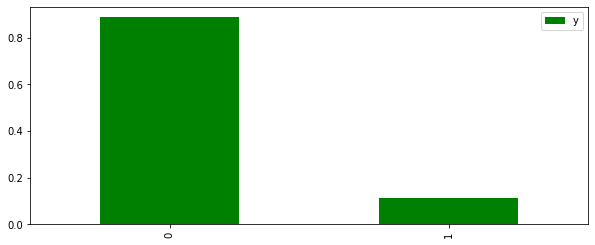

In [4]:
loan = dataframe["y"].value_counts(normalize=True).to_frame()
plt.rcParams['figure.figsize'] = (10.0, 4.0)    # ... and big plots
loan.plot.bar(color='g')
loan.T

In [5]:
### We can see that there are many cathegorical variables in the databases what could teach us about
### what is going on with the frauds.
### We are going to build a function that graphs which of these categorical variables have more in common
### with the credit card frauds.

def compare_category(df,colname,targetname):
    ### This function checks the target value difference of a given cathegory in the case
    ### of binary classifications.
    
    ## Arguments:
    # df: is a data frame.
    # colname: is a string. The column name to be evaluated.
    # targetname: is a string. The column name of the target variable.
    
    # caculate aggregate stats
    df_cate = df.groupby([colname])[targetname].agg(['count', 'sum', 'mean'])
    df_cate.reset_index(inplace=True)
    #print(df_cate)
    
    # plot visuals
    f, ax = plt.subplots(figsize=(20, 8))
    plt1 = sns.lineplot(x=colname, y="mean", data=df_cate,color="b")
    plt.xticks(size=20,rotation=90)
    plt.yticks(size=20,rotation=0)
    
    for tl in ax.get_yticklabels():
        tl.set_color('b')

    ax2 = ax.twinx()
    plt2 = sns.barplot(x=colname, y="count", data=df_cate,
                       ax=ax2,alpha=0.5)   
    
    
#MERGING BOTH DATABASES FOR EASIER ANALYSIS
#dataset_train_identity_transaction = pd.concat([dataset_train_identity,dataset_train_transaction],sort=True)

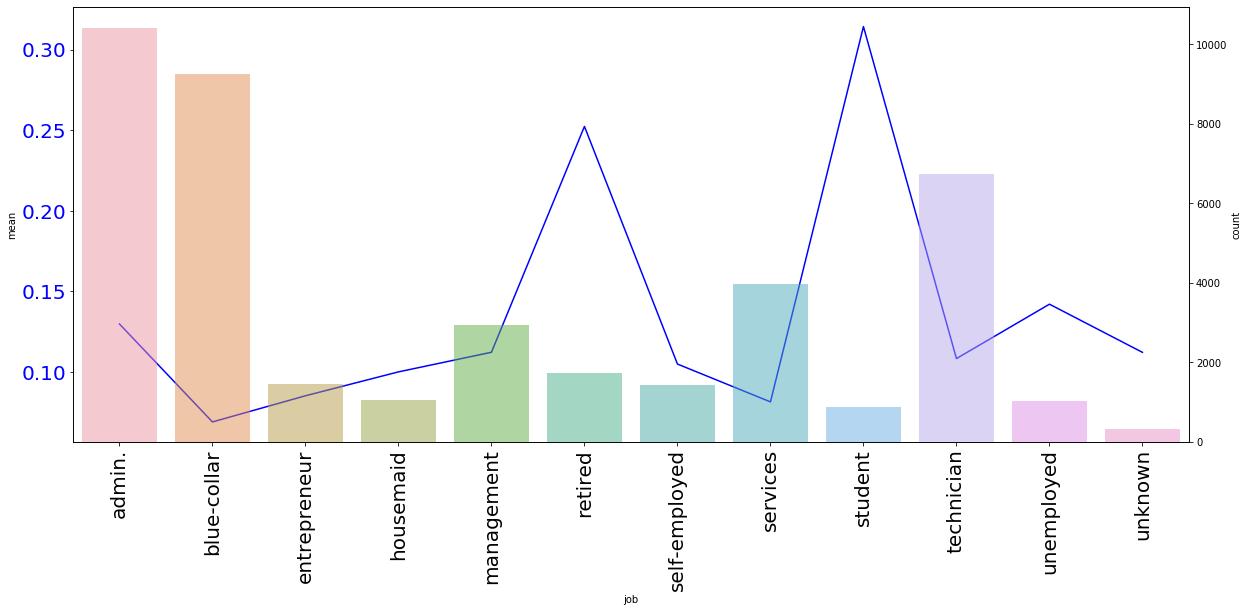

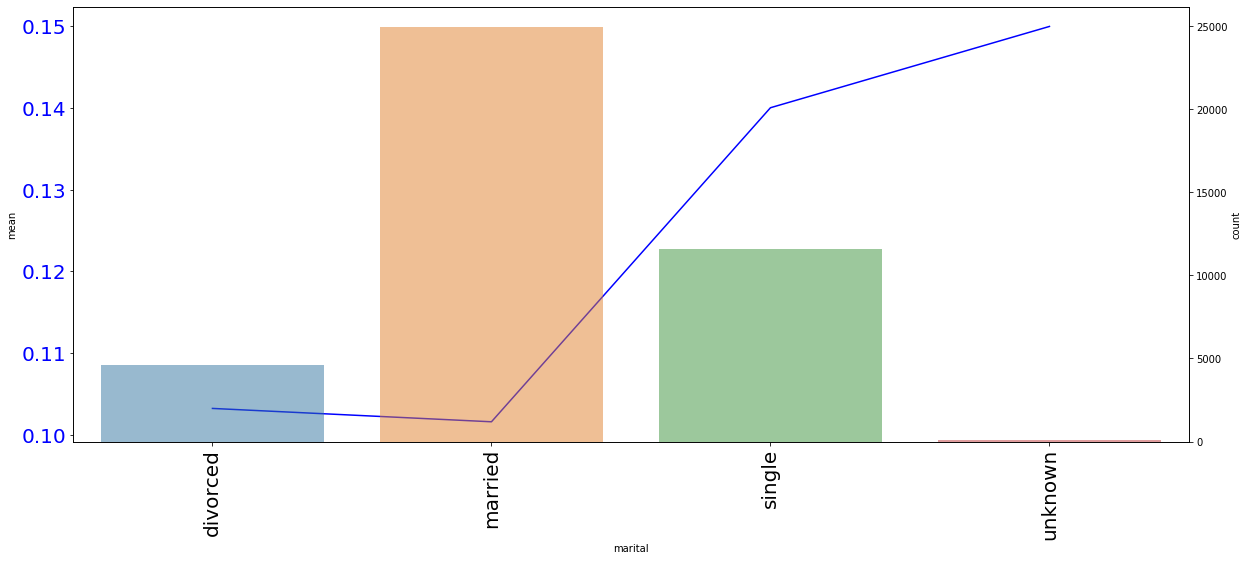

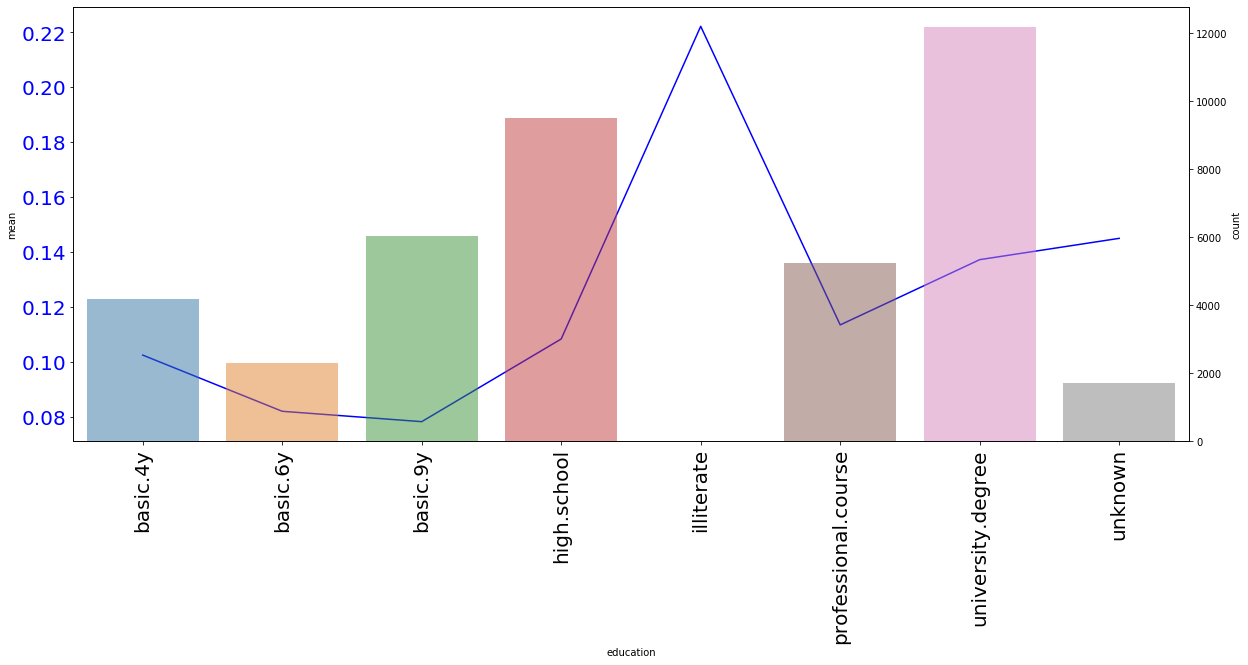

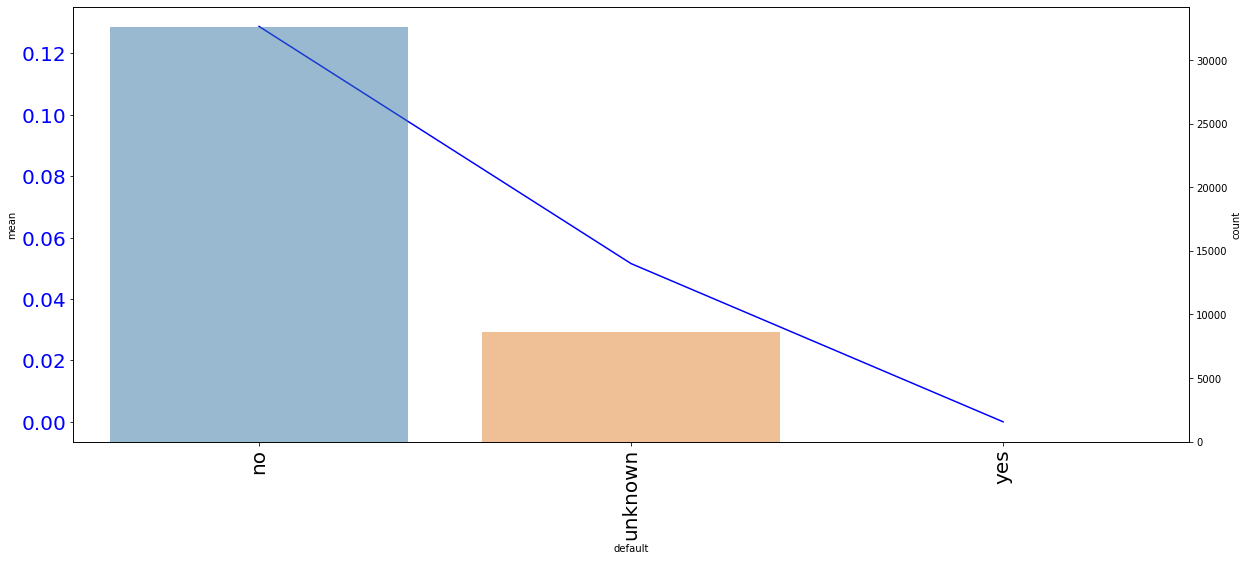

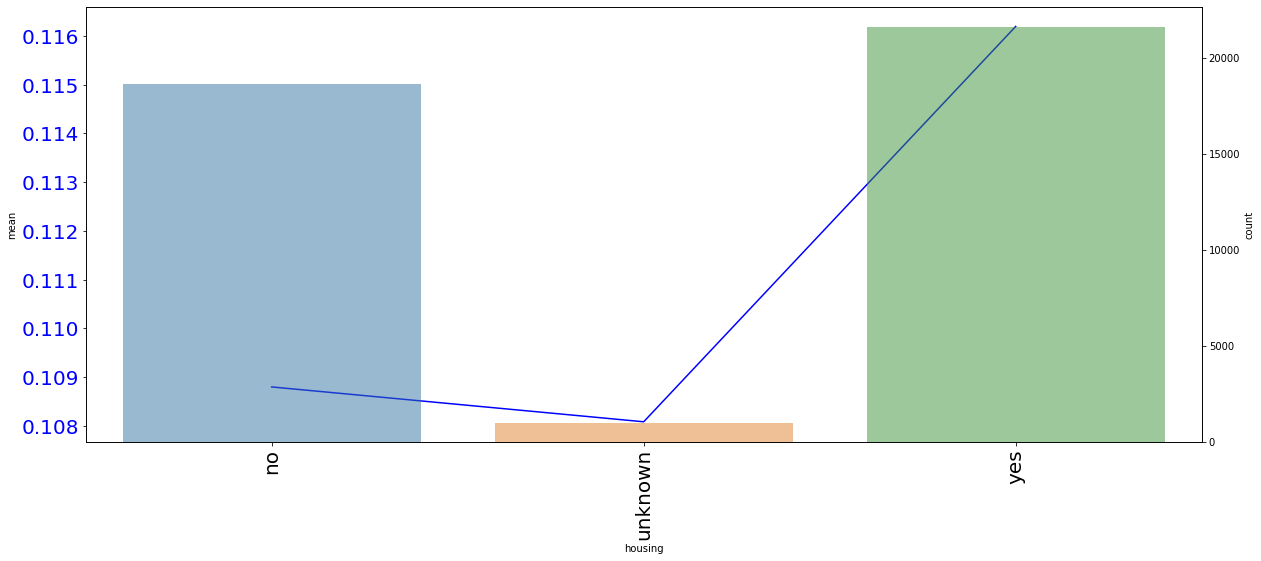

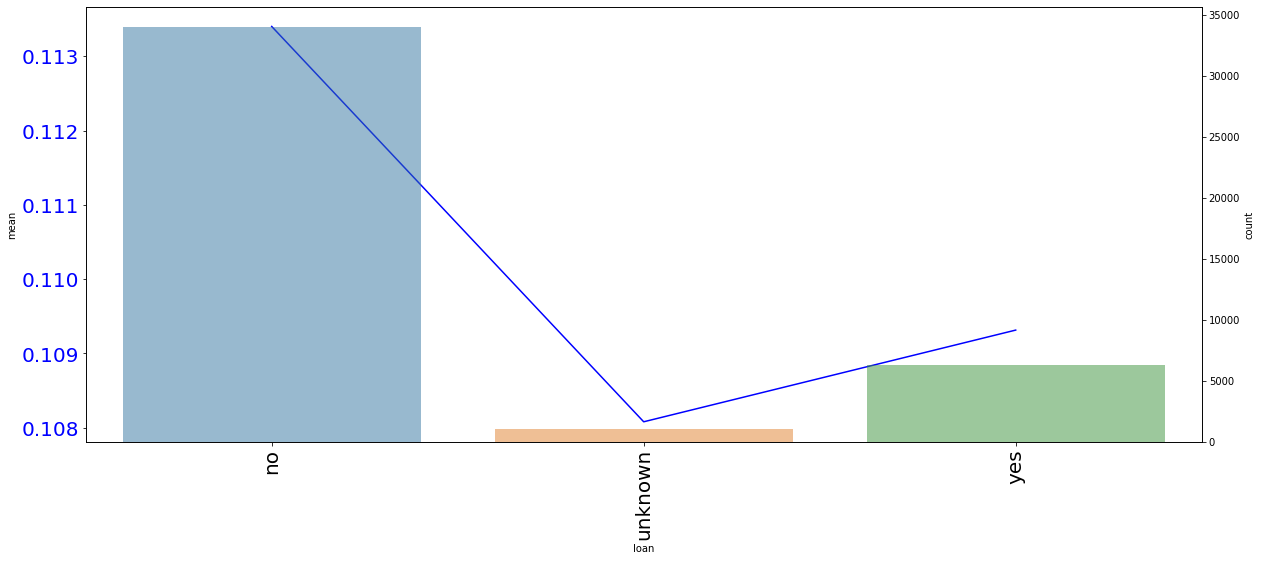

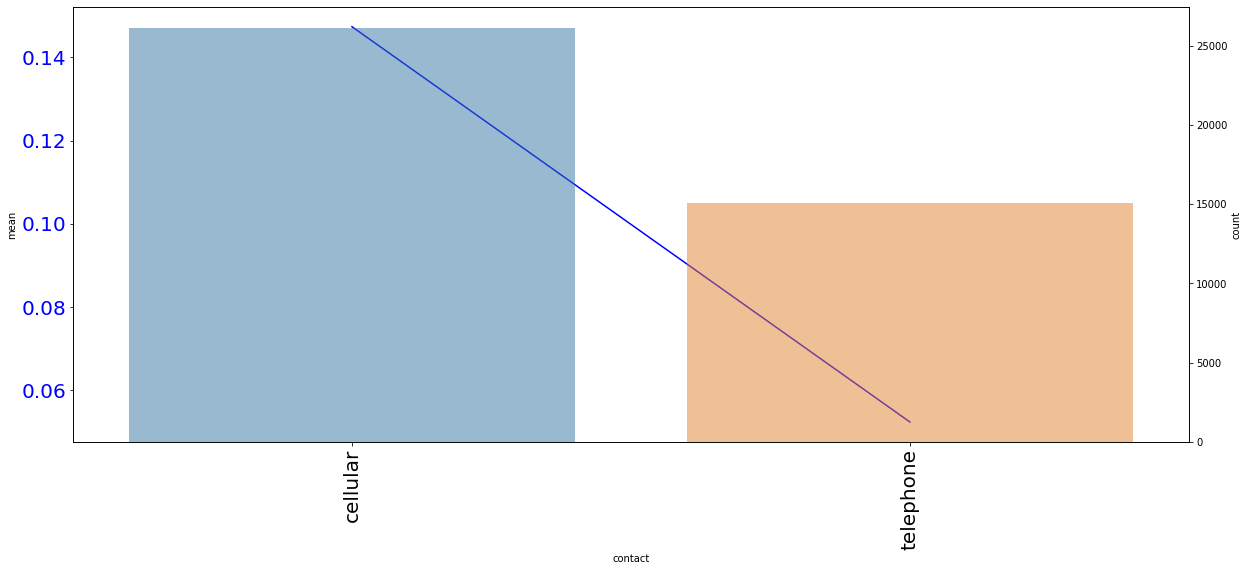

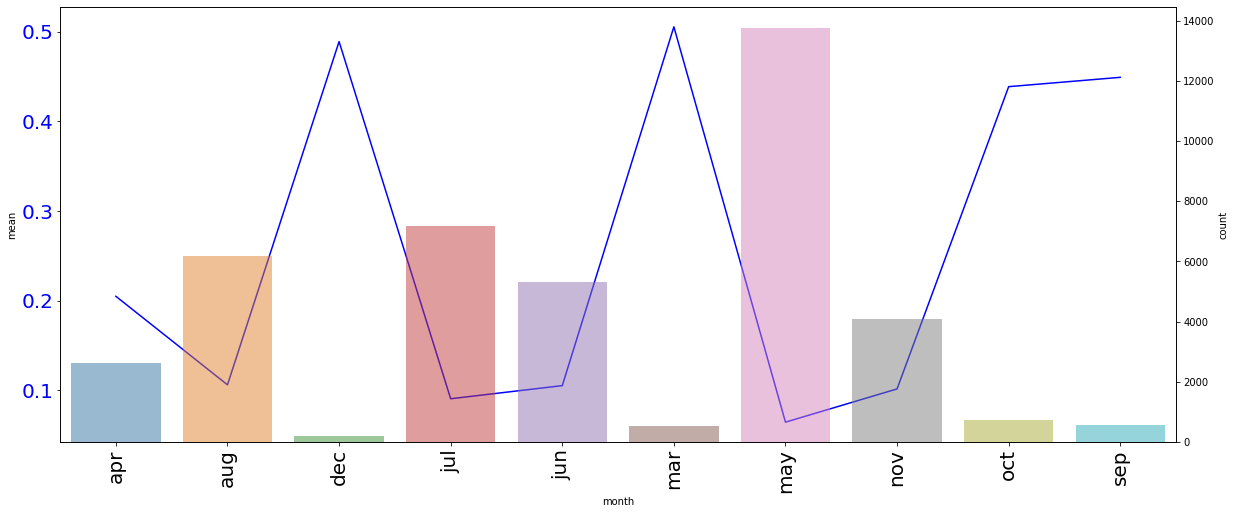

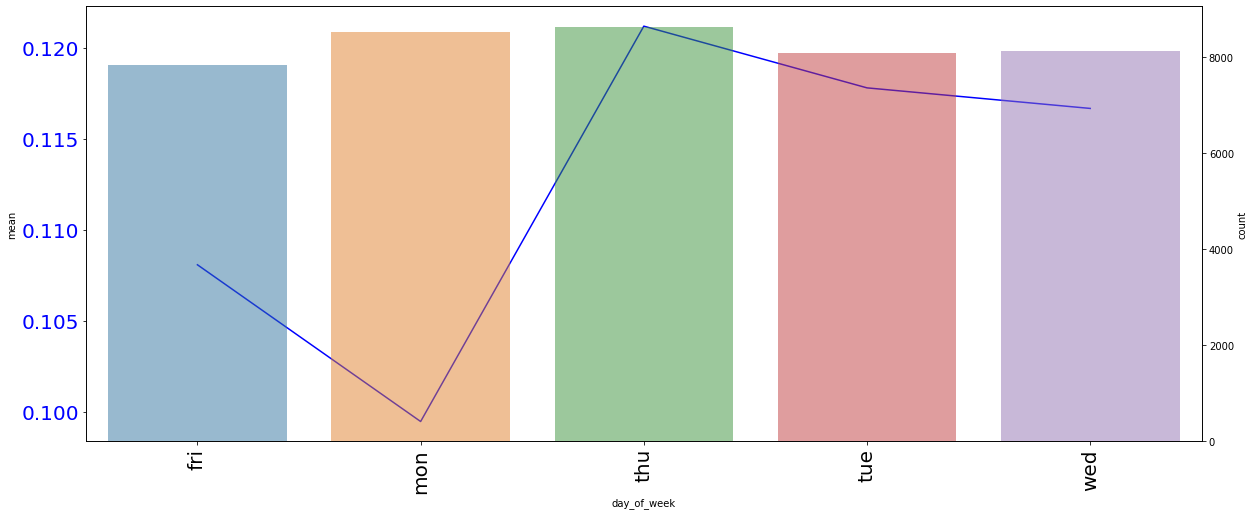

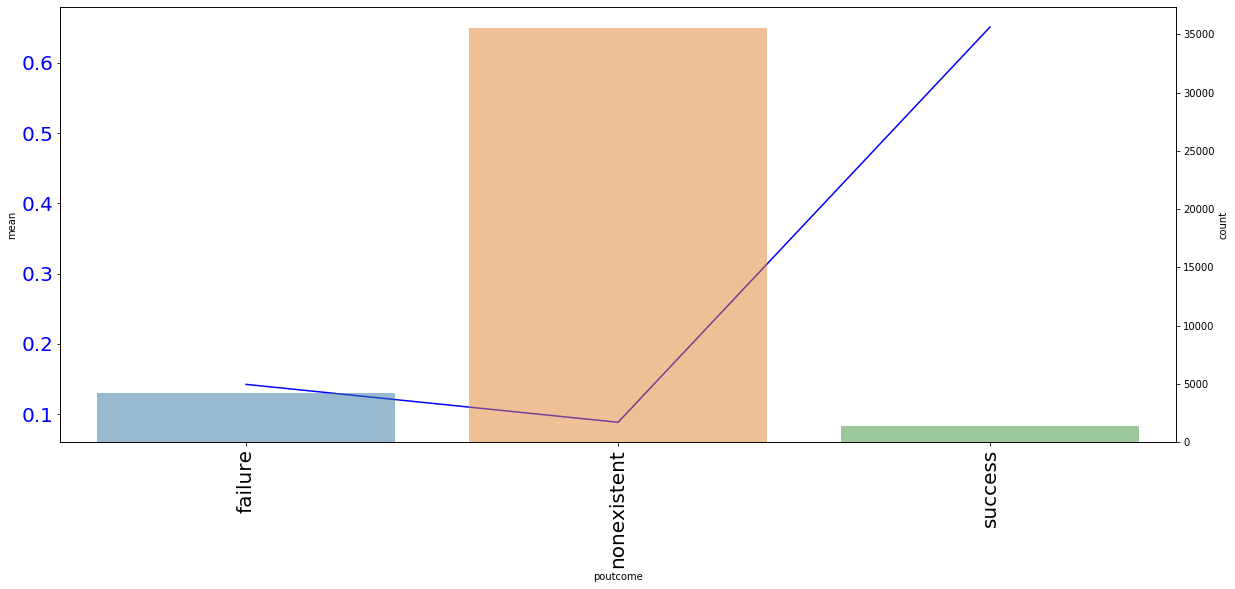

In [6]:
cat_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for el in cat_vars:
    compare_category(dataframe,el,"y")

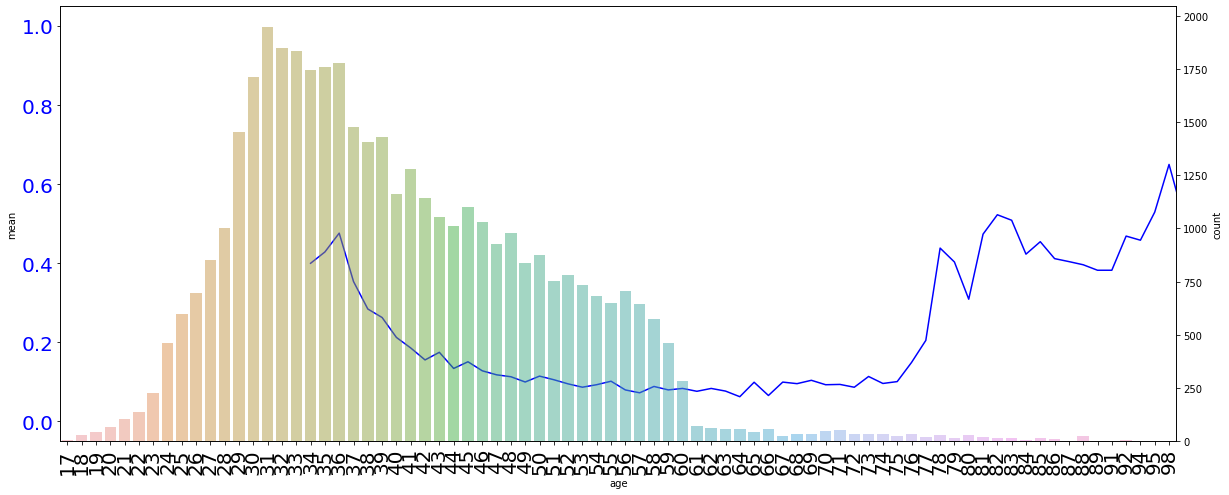

In [7]:
compare_category(dataframe,"age","y")

In [8]:
#dataframe['job'] = dataframe['job'].replace(["admin.", "blue-collar", "entrepreneur", "technician", "services", "management", "self-employed"], 'employed')
#dataframe['job'] = dataframe['job'].replace(["retired", "housemaid", "student"], 'unemployed')

In [9]:
#dataframe['job'].value_counts()

In [10]:
#dataframe["education"] = dataframe["education"].replace(["university.degree", "high.school", "basic.9y", "professional.course", "basic.4y", "basic.6y"],"literate")

In [11]:
#dataframe["education"].value_counts()

In [12]:
#dataframe

In [13]:
dataframe=pd.get_dummies(dataframe)

In [14]:
#dataframe['job'] = dataframe['job'].map( {"employed":1, "unemployed":0, "unknown":-1 })
#dataframe['marital'] = dataframe['marital'].map( {"married":2, "single":1, "divorced":0, "unknown":-1 })
#dataframe['education'] = dataframe['education'].map({"literate":1, "illiterate":0, "unknown":-1})
#dataframe['default'] = dataframe['default'].map({"yes":1, "no":0, "unknown":-1})
#dataframe['housing'] = dataframe['housing'].map({"yes":1, "no":0, "unknown":-1})
#dataframe['loan'] = dataframe['loan'].map({"yes":1, "no":0, "unknown":-1})
#dataframe['contact'] = dataframe['contact'].map({"cellular":1, "telephone":0})
#dataframe['month'] = dataframe['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
#dataframe['day_of_week'] = dataframe['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})
#dataframe['poutcome'] = dataframe['poutcome'].map({'success':1, 'failure':0, 'nonexistent':-1})

In [15]:
dataframe

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0


In [16]:
dataframe.shape

(41188, 64)

# Correlation matrix

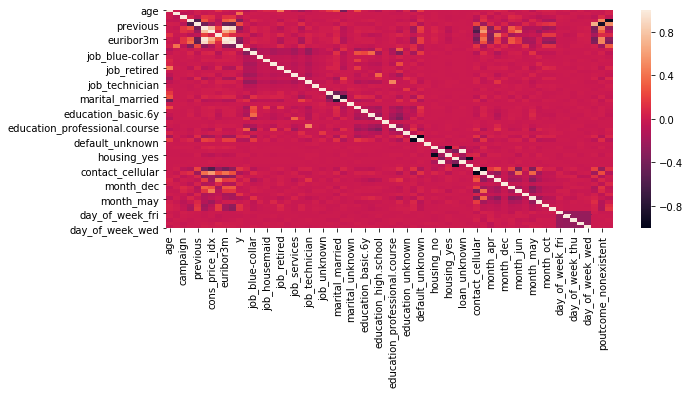

In [17]:
#Now we check for correlations between the columns and we make a heatmap plot
sns.heatmap(dataframe.corr(),annot=False)
plt.rcParams['figure.figsize'] = (50.0, 50.0)    # ... and big plots
# We see no visible correlations among the columns, so we proceed with the analysis

# Delete correlated columns from the database

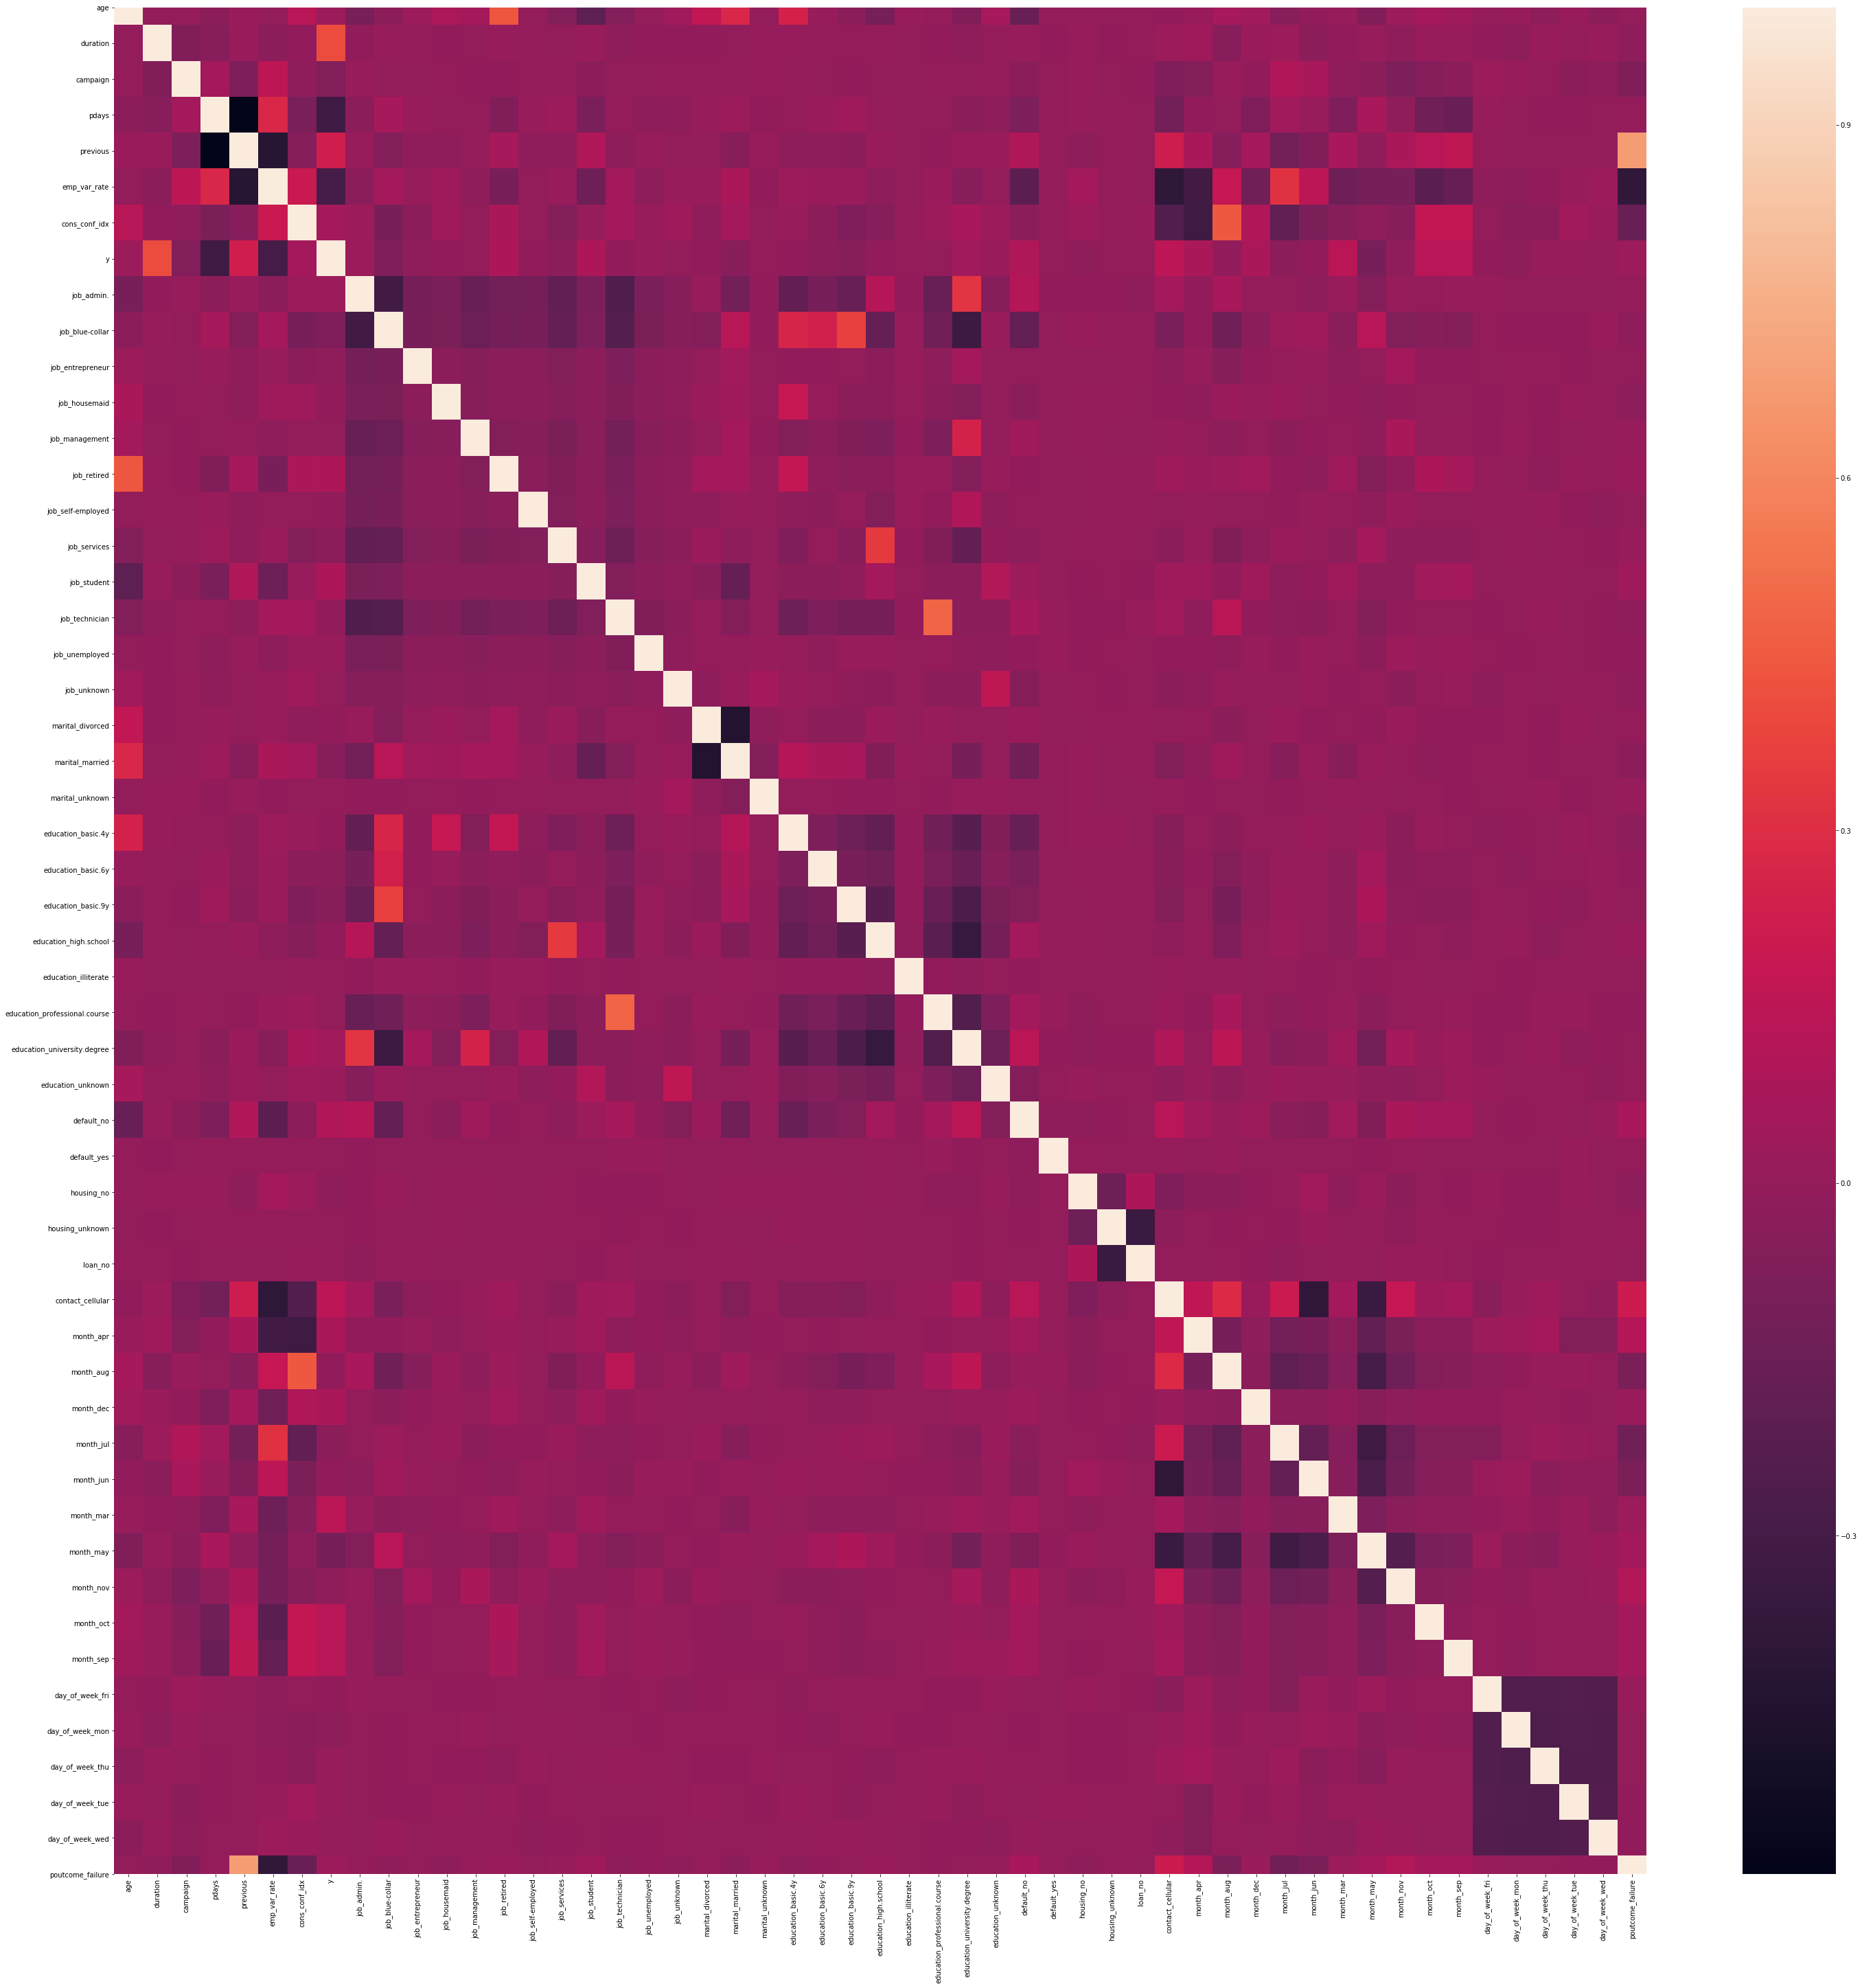

In [18]:
corr_matrix = dataframe.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in dataframe.columns if any(upper[column]>0.75)]
dataframe=dataframe.drop(to_drop,axis=1)    

sns.heatmap(dataframe.corr(),annot=False)
plt.rcParams['figure.figsize'] = (50.0, 50.0)    # ... and big plots

In [19]:
dataframe

,age,duration,campaign,pdays,previous,emp_var_rate,cons_conf_idx,y,job_admin.,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure
0,44,210,1,999,0,1.4,-36.1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,53,138,1,999,0,-0.1,-42.0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,28,339,3,6,2,-1.7,-39.8,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,39,185,2,999,0,-1.8,-47.1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,55,137,1,3,1,-2.9,-31.4,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,-41.8,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41184,31,196,2,999,0,1.1,-36.4,0,0,0,...,1,0,0,0,0,0,1,0,0,0
41185,42,62,3,999,0,1.1,-36.4,0,1,0,...,1,0,0,0,0,0,0,0,1,0
41186,48,200,2,999,0,-3.4,-26.9,0,0,0,...,0,0,1,0,0,0,0,1,0,0


# Prepare the database for further analysis

In [20]:
# Database cleaning and preparation for the analysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Evaluating the accuracy of the performed analysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
#Setting up the training and test variables. The test size is 20% of the total amount of data.
X = dataframe.iloc[:,:-1].values
Y = dataframe.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.3)

#We scale our training and test datasets to have zero mean and a standard deviation of 1.
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

The distance between the centroids is: 383.87


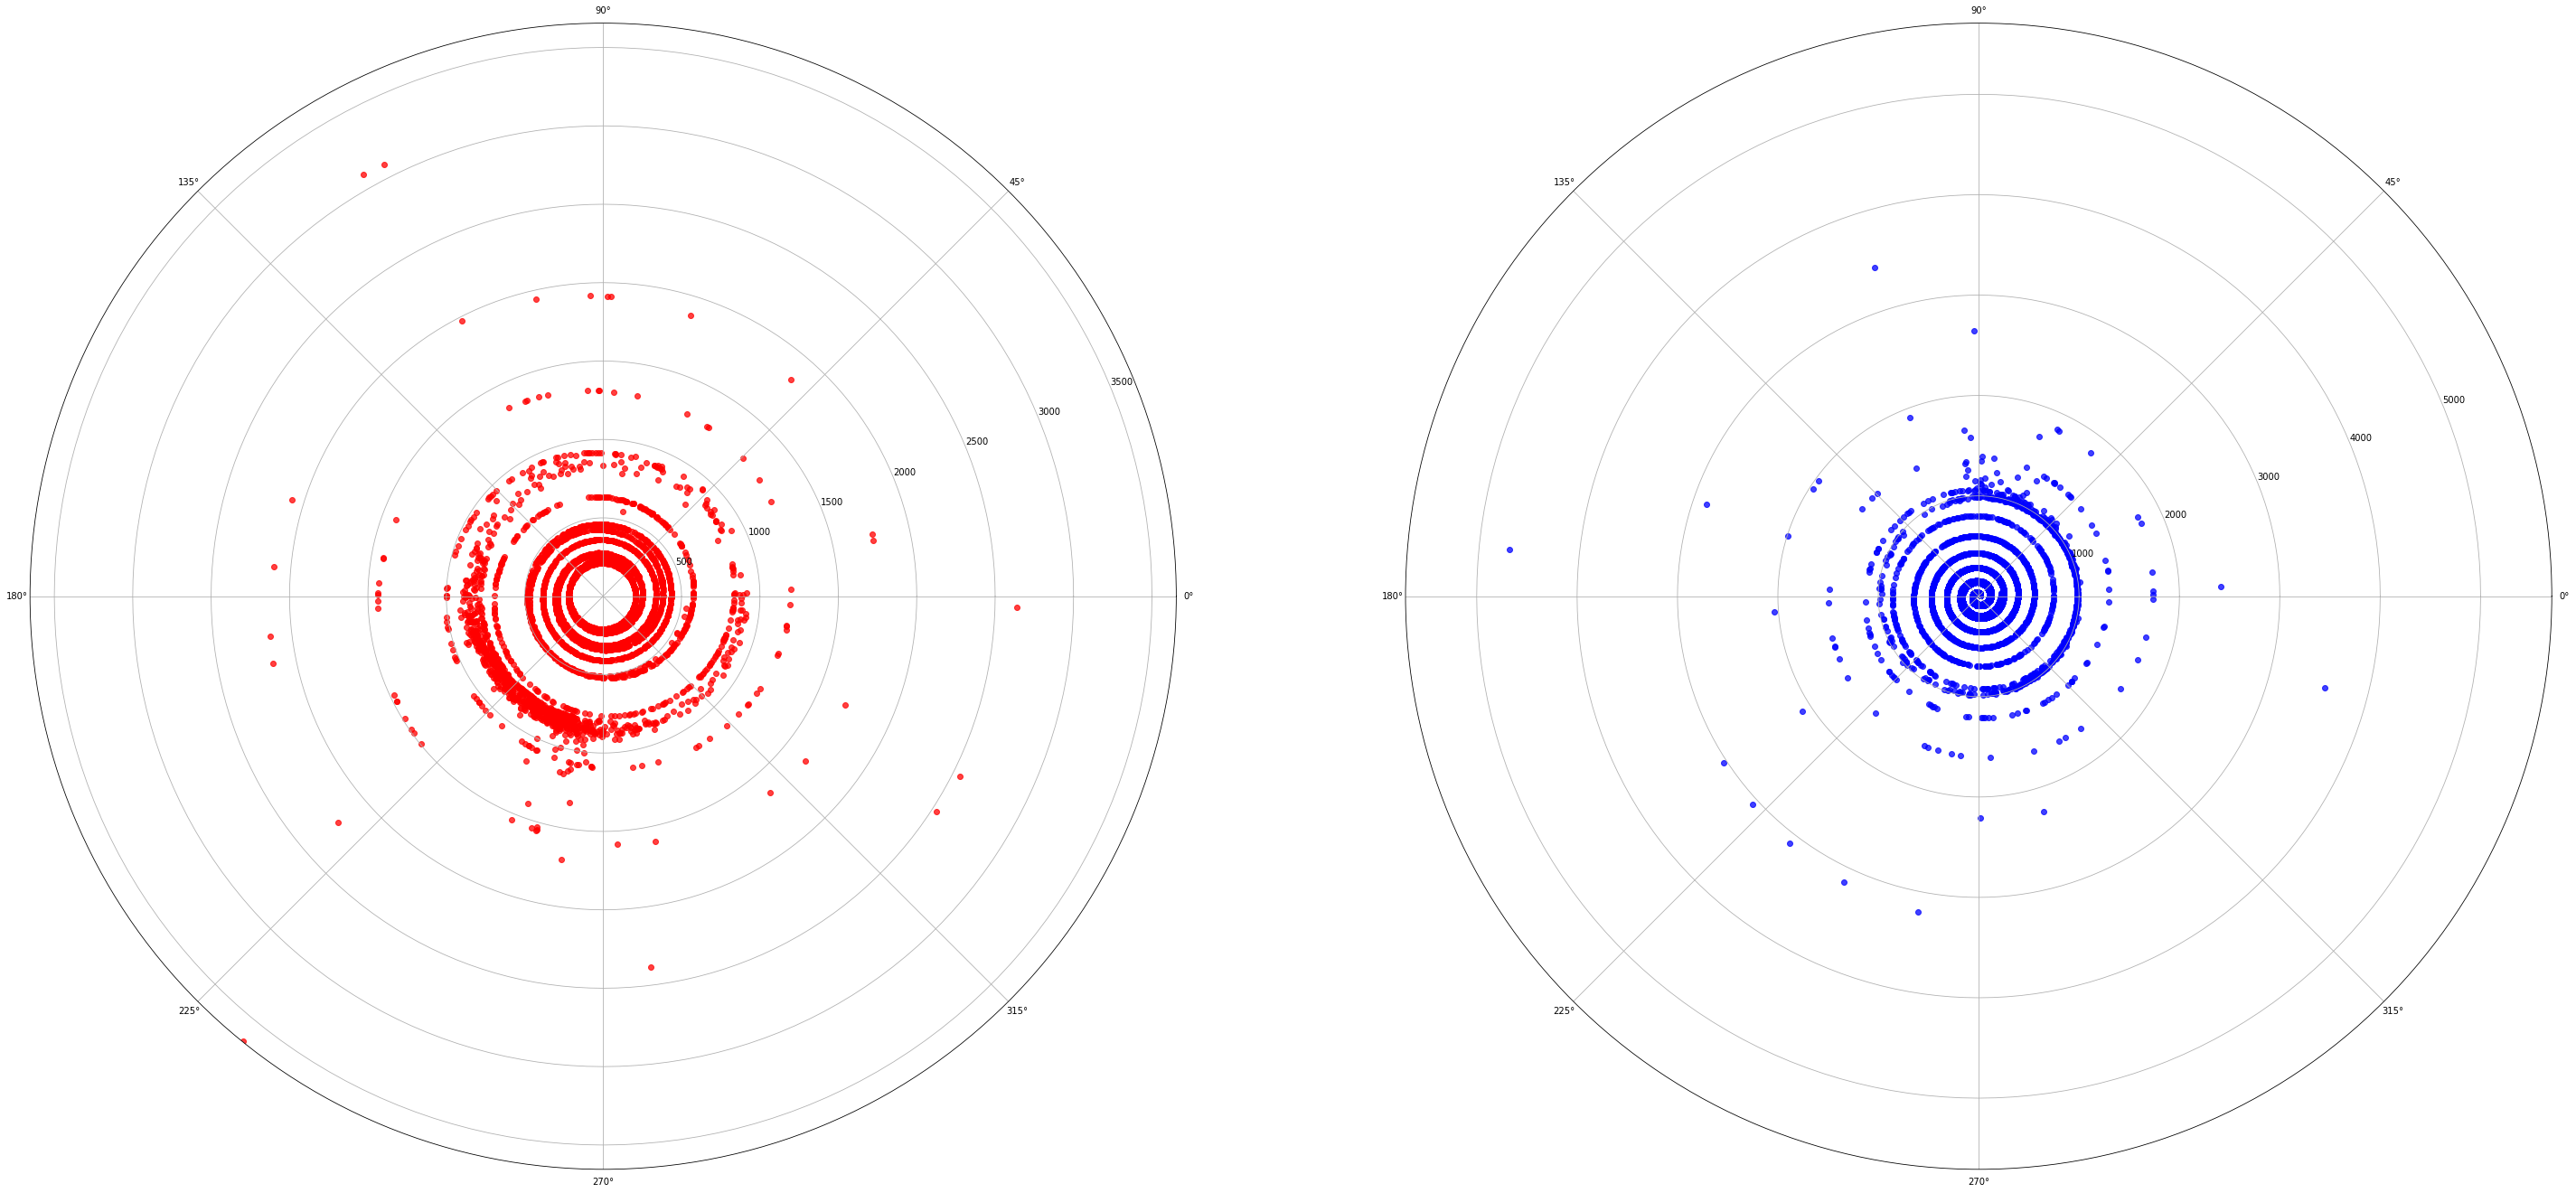

In [22]:
import scipy

def centroid_vector(t_array):
    return sum(t_array)/len(t_array)
    

def euclidean_distance(point,t_array):
    result =[]
    for el in t_array:
        result.append(scipy.spatial.distance.euclidean(point, el))
    return result

def angular_distribution(point,t_array):
    result = []
    for el in t_array:
        result.append((180.0/np.pi)*np.arccos(sum((a*b) for a, b in zip(point, el))/(np.linalg.norm(point)*np.linalg.norm(el))))
        
    return result


fraud = dataframe[dataframe["y"]==1]
notfraud = dataframe[dataframe["y"]==0]

print("The distance between the centroids is:", round(scipy.spatial.distance.euclidean(centroid_vector(fraud.values), centroid_vector(notfraud.values)),2))


theta_fraud = angular_distribution(centroid_vector(fraud.values),fraud.values)
theta_notfraud = angular_distribution(centroid_vector(notfraud.values),notfraud.values)

r_fraud = euclidean_distance(centroid_vector(fraud.values),fraud.values)
r_notfraud = euclidean_distance(centroid_vector(notfraud.values),notfraud.values)

fig = plt.figure()
ax1 = fig.add_subplot(121, polar=True)
c_fraud = ax1.scatter(theta_fraud, r_fraud, c='r', cmap='hsv', alpha=0.75)
ax1.set_thetamin(0)
ax1.set_thetamax(360)

ax2 = fig.add_subplot(122, polar=True)
c_notfraud = ax2.scatter(theta_notfraud, r_notfraud, c='b', cmap='hsv', alpha=0.75)
ax2.set_thetamin(0)
ax2.set_thetamax(360)

plt.rcParams['figure.figsize'] = (20.0, 20.0)    # ... and big plots
#ax3 = ax2.twinx()

#plt.show()

# Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[11100    27]
 [   33  1197]]
The log determinant is: 7.123388004628012
The accuracy goal is: 99.51 %


Text(159.0, 0.5, 'Actual')

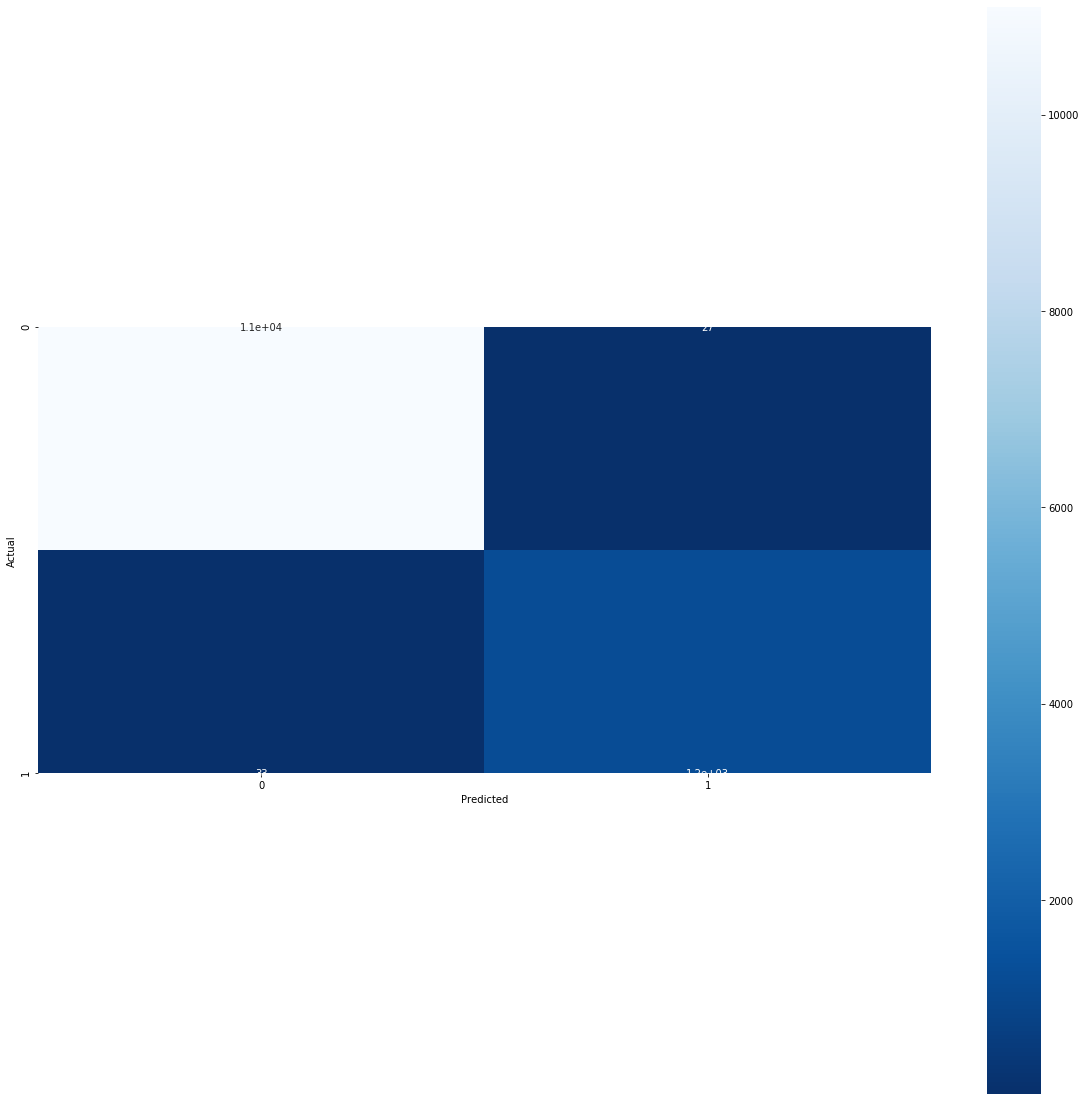

In [23]:
from sklearn.linear_model import LogisticRegression

#Now it is time to start classifying our target data using the Logisitic Regression algorithm.
Log_Classifier = LogisticRegression()
Log_Classifier.fit(X_train,Y_train)
Y_pred_log = Log_Classifier.predict(X_test)

c_matrix_log = confusion_matrix(Y_test,Y_pred_log)
accgoal_log = accuracy_score(Y_test, Y_pred_log)
print(c_matrix_log)
print('The log determinant is:', np.log10(np.linalg.det(c_matrix_log)))
print("The accuracy goal is:",round(accgoal_log*100,2),"%")

sns.heatmap(c_matrix_log, annot=True, square=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# kNN Algorithm

The k parameter is: 11
[[11121     6]
 [  757   473]]
The log determinant is: 6.720629823648418
The accuracy goal is: 93.83 %


Text(159.0, 0.5, 'Actual')

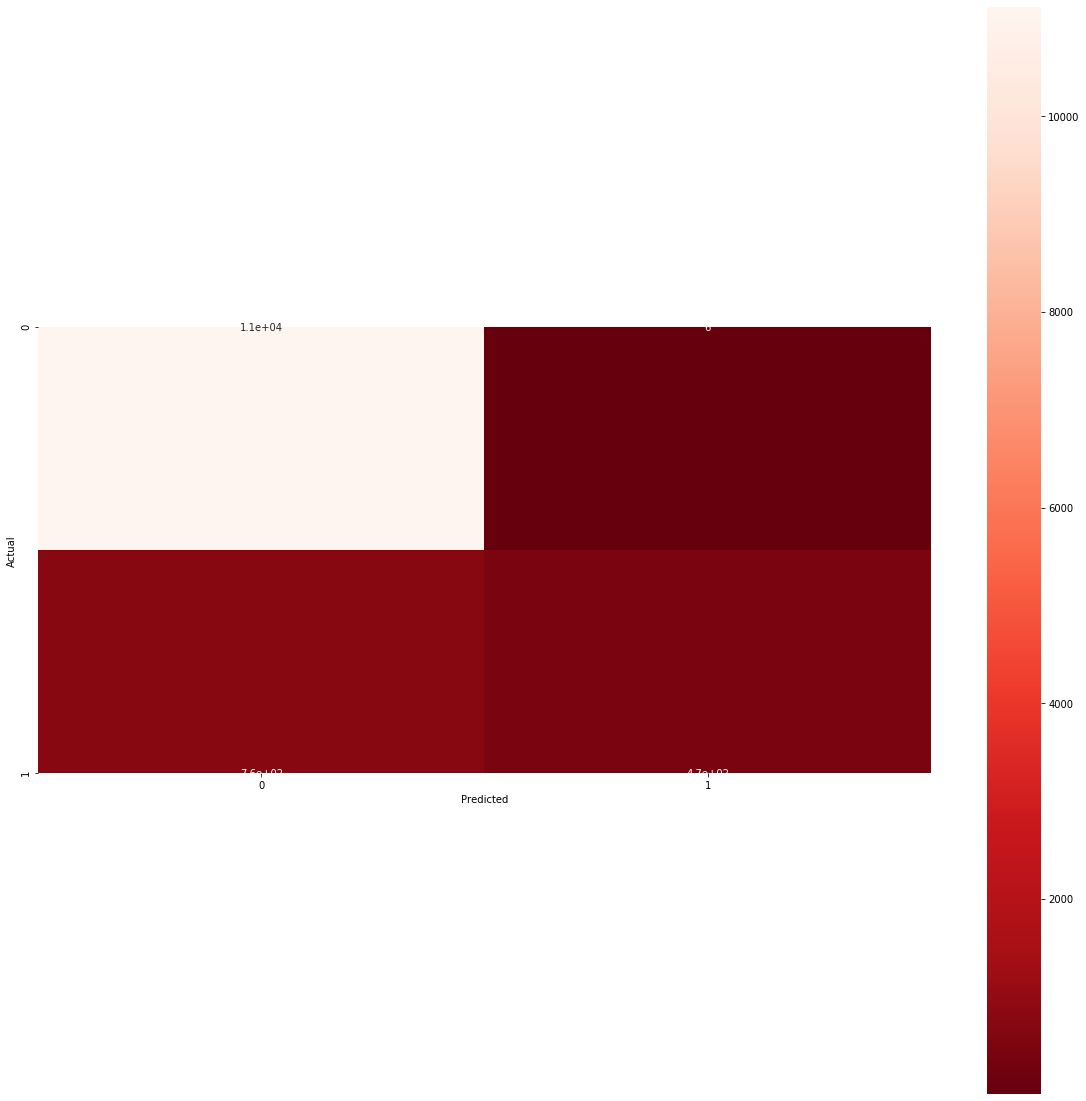

In [24]:
from sklearn.neighbors import KNeighborsClassifier

### We will repeat the same analysis but now with the KNN algorithm

kNN = 11 #I will use this parameter and we see that the accuracy is better than the Logistic regression.
print('The k parameter is:', kNN)
classifier = KNeighborsClassifier(n_neighbors = kNN, p = 2, metric = 'euclidean' )
classifier.fit(X_train, Y_train)
Y_pred_knn = classifier.predict(X_test)

c_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
accgoaal_knn = accuracy_score(Y_test, Y_pred_knn)
print(c_matrix_knn)
print('The log determinant is:', np.log10(np.linalg.det(c_matrix_knn)))
print("The accuracy goal is:",round(accgoaal_knn*100,2),"%")


sns.heatmap(c_matrix_knn, annot=True, square=True, cmap = 'Reds_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Light Gradient Boosting algorithm

[[11014   113]
 [    0  1230]]
The log determinant is: 7.131850183584662
The accuracy goal is: 99.09 %
-----------------------


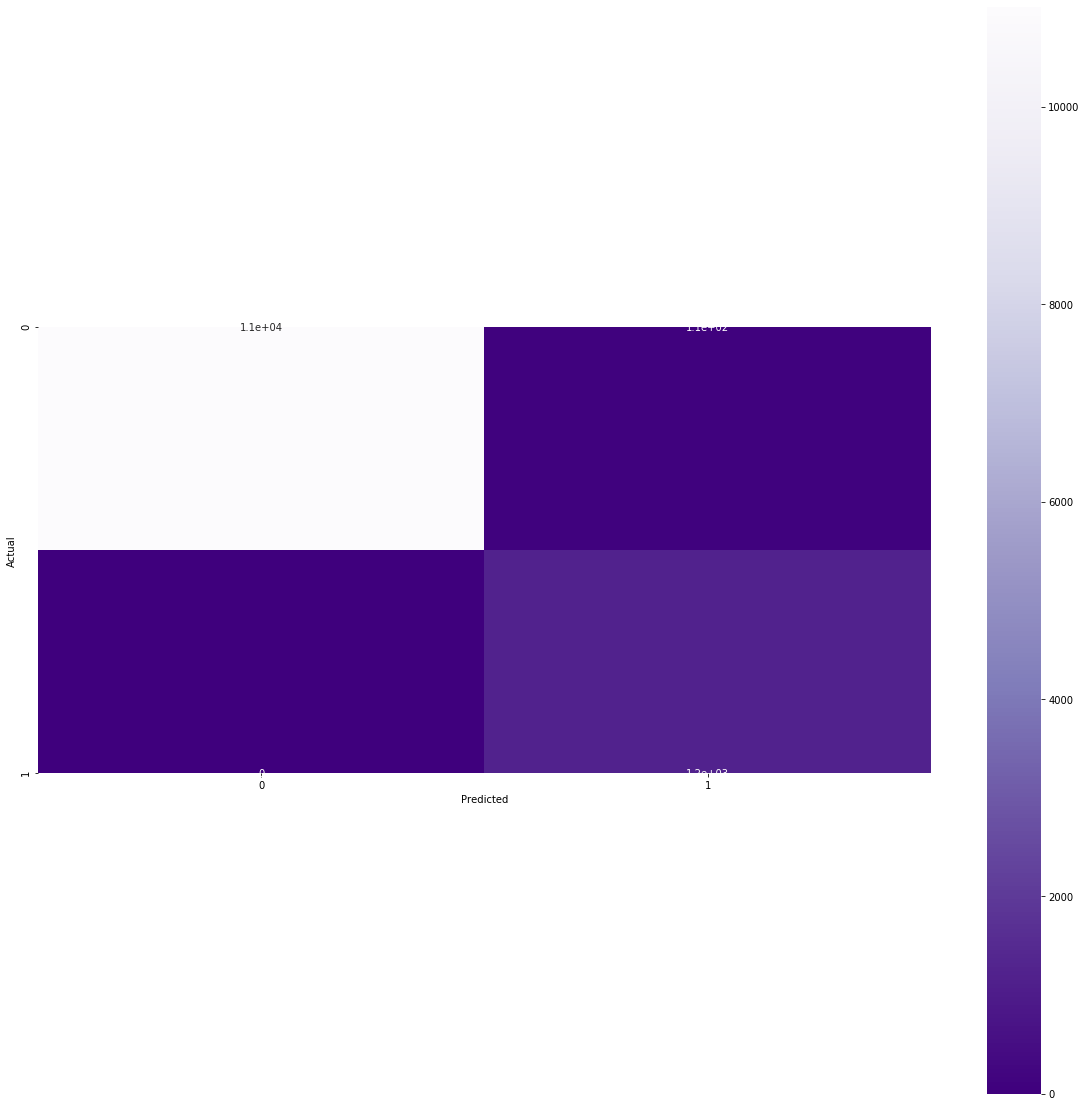

In [25]:
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# For this task we use a simple set of parameters to train the model. 
# We just want to create a baseline model, so we are not performing here cross validation or parameter tunning.

lgb_train = lgb.Dataset(X_train, Y_train, free_raw_data=False)
lgb_test = lgb.Dataset(X_test, Y_test, reference=lgb_train, free_raw_data=False)

parameters = {'num_leaves': 2**8,
              'learning_rate': 0.1,
              'is_unbalance': True,
              'min_split_gain': 0.1,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', # comment this line if you are not using GPU
              'task': 'train'
              }
num_rounds = 300


clf = lgb.train(parameters, lgb_train, num_boost_round=num_rounds)

Y_prob_gb = clf.predict(X_test)

Y_pred_gb = np.where(Y_prob_gb > 0.5, 1, 0)
cmatrix_gb = confusion_matrix(Y_test,Y_pred_gb)
accgoal_gb = accuracy_score(Y_test, Y_pred_gb)
print(cmatrix_gb)
print('The log determinant is:', np.log10(np.linalg.det(cmatrix_gb)))
print("The accuracy goal is:", round(accgoal_gb*100,2),'%')


plt.figure()
sns.heatmap(cmatrix_gb, annot=True, square=True, cmap = 'Purples_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (5.0, 5.0)    # ... and big plots
print('-----------------------')

# Random Forest algorithm

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[11043    84]
 [  134  1096]]
The log determinant is: 7.082493541252395
The accuracy goal is: 98.24 %


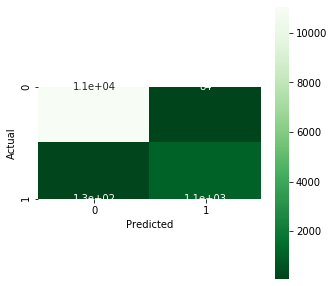

In [26]:
from sklearn.ensemble import RandomForestClassifier

classif_rmd = RandomForestClassifier(min_samples_leaf=150)
classif_rmd.fit(X_train, Y_train)
Y_pred_rmf = classif_rmd.predict(X_test)
accgoal_rmf = accuracy_score(Y_pred_rmf, Y_test)
cmatrix_rmf = confusion_matrix(Y_test, Y_pred_rmf)
print(cmatrix_rmf)
print('The log determinant is:', np.log10(np.linalg.det(cmatrix_rmf)))
print("The accuracy goal is:", round(accgoal_rmf*100,2),'%')


sns.heatmap(cmatrix_rmf, annot=True, square=True, cmap = 'Greens_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (5.0, 5.0)    # ... and big plots

# Empirical sigmoid function

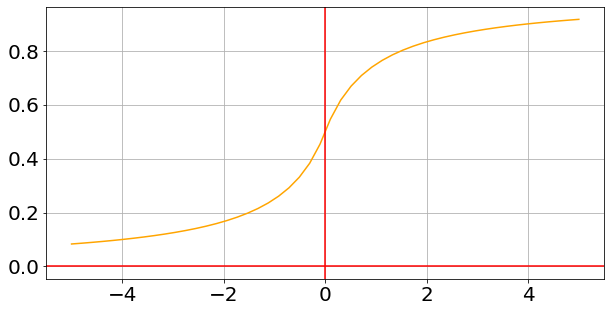

In [27]:
def empirical_sigmoid(x):
    return 0.5*(1.0 + x/(1.0+np.abs(x)))

xsig = np.linspace(-5,5,50)
ysig = empirical_sigmoid(xsig)

# plot visuals
f, ax = plt.subplots(figsize=(10, 5))
plt1 = plt.plot(xsig, ysig, color="orange")
plt.xticks(size=20,rotation=0)
plt.yticks(size=20,rotation=0)
ax.grid(True, which='both')
ax.axhline(y=0, color='r')
ax.axvline(x=0, color='r')

CPU times: user 2h 29min 30s, sys: 37min 31s, total: 3h 7min 2s
Wall time: 48min 19s
[[11080    47]
 [   43  1187]]
The log determinant is: 7.118923738223128
The accuracy goal is: 99.27 %


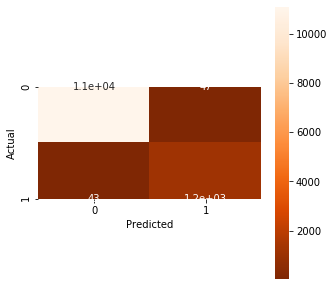

In [28]:
class Empirical_Classifier:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __empirical_class(self, z):
        return 0.5*(1.0 + z/(1.0+np.abs(z)))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__empirical_class(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__empirical_class(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print('floss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__empirical_class(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

model = Empirical_Classifier(lr=0.1, num_iter=300000)
%time model.fit(X_train, Y_train)
Y_pred_emp = model.predict(X_test)
params = model.theta

accgoal_emp = accuracy_score(Y_pred_emp, Y_test)
c_matrix_emp = confusion_matrix(Y_test, Y_pred_emp)
print(c_matrix_emp)
print('The log determinant is:', np.log10(np.linalg.det(c_matrix_emp)))
print("The accuracy goal is:", round(accgoal_emp*100,2),'%')

sns.heatmap(c_matrix_emp, annot=True, square=True, cmap = 'Oranges_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (8.0, 8.0)    # ... and big plots

# Artificial Neural Networks


Epoch 1/150
28831/28831 [==============================] - 2s 80us/step - loss: 0.1741 - accuracy: 0.9184
Epoch 2/150
28831/28831 [==============================] - 1s 48us/step - loss: 0.0672 - accuracy: 0.9933
Epoch 3/150
28831/28831 [==============================] - 2s 53us/step - loss: 0.0490 - accuracy: 0.9947
Epoch 4/150
28831/28831 [==============================] - 1s 48us/step - loss: 0.0355 - accuracy: 0.9953
Epoch 5/150
28831/28831 [==============================] - 1s 47us/step - loss: 0.0268 - accuracy: 0.9960
Epoch 6/150
28831/28831 [==============================] - 1s 45us/step - loss: 0.0209 - accuracy: 0.9961
Epoch 7/150
28831/28831 [==============================] - 1s 45us/step - loss: 0.0172 - accuracy: 0.9962
Epoch 8/150
28831/28831 [==============================] - 1s 48us/step - loss: 0.0150 - accuracy: 0.9962
Epoch 9/150
28831/28831 [==============================] - 1s 50us/step - loss: 0.0133 - accuracy: 0.9961
Epoch 10/150
28831/28831 [===================

28831/28831 [==============================] - 1s 45us/step - loss: 0.0044 - accuracy: 0.9978
Epoch 76/150
28831/28831 [==============================] - 1s 46us/step - loss: 0.0046 - accuracy: 0.9979
Epoch 77/150
28831/28831 [==============================] - 1s 43us/step - loss: 0.0042 - accuracy: 0.9981
Epoch 78/150
28831/28831 [==============================] - 1s 43us/step - loss: 0.0047 - accuracy: 0.9978
Epoch 79/150
28831/28831 [==============================] - 1s 44us/step - loss: 0.0047 - accuracy: 0.9981
Epoch 80/150
28831/28831 [==============================] - 1s 45us/step - loss: 0.0047 - accuracy: 0.9978
Epoch 81/150
28831/28831 [==============================] - 1s 48us/step - loss: 0.0043 - accuracy: 0.9979
Epoch 82/150
28831/28831 [==============================] - 1s 45us/step - loss: 0.0043 - accuracy: 0.9979
Epoch 83/150
28831/28831 [==============================] - 1s 46us/step - loss: 0.0043 - accuracy: 0.9981
Epoch 84/150
28831/28831 [========================

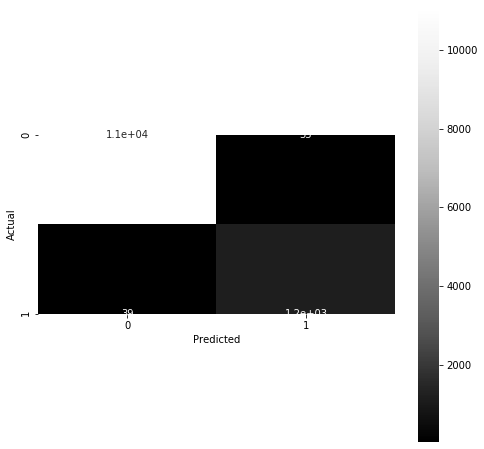

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense# Initialising the ANN
"Activation functions: 'sigmoid', 'tanh', 'relu'"
classifier = Sequential()# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 52))# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 32, epochs = 150)

# Predicting the Test set results
Y_pred_ann = classifier.predict(X_test)
Y_pred_ann = (Y_pred_ann > 0.5)
accgoal_ann = accuracy_score(Y_pred_ann, Y_test)

cmatrix_ann = confusion_matrix(Y_test, Y_pred_ann) # rows = truth, cols = prediction
print(cmatrix_ann)
print('The log determinant is:', np.log10(np.linalg.det(cmatrix_ann)))
print("The accuracy goal is:", round(accgoal_ann*100,2),'%')


sns.heatmap(cmatrix_ann, annot=True, square=True, cmap = 'Greys_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (8.0, 8.0)    # ... and big plots

# Comparison between the different classification algorithms

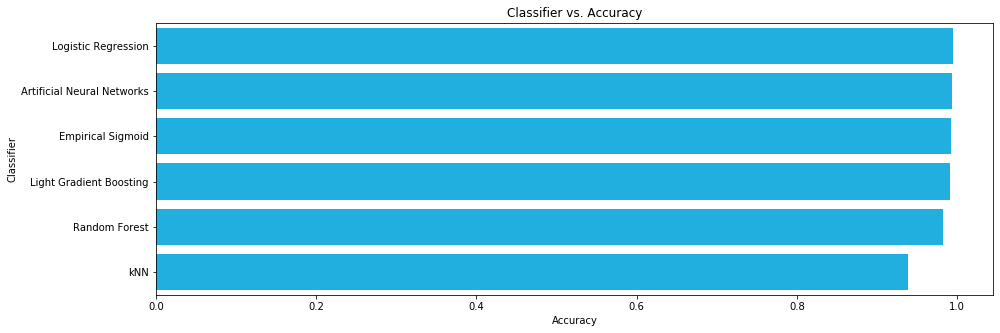

In [33]:
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
log_entry = pd.DataFrame([['Logistic Regression',accgoal_log],['Artificial Neural Networks',accgoal_ann],['Empirical Sigmoid', accgoal_emp],['Light Gradient Boosting',accgoal_gb],['Random Forest', accgoal_rmf],['kNN',accgoaal_knn]], columns=log_cols)
        #metric_entry = pd.DataFrame([[precision,recall,f1_score,roc_auc]], columns=metrics_cols)
log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier vs. Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="deepskyblue")  
plt.rcParams['figure.figsize'] = (15.0, 5.0)    # ... and big plots
plt.show()

# SMOTE: Generate synthetic samples

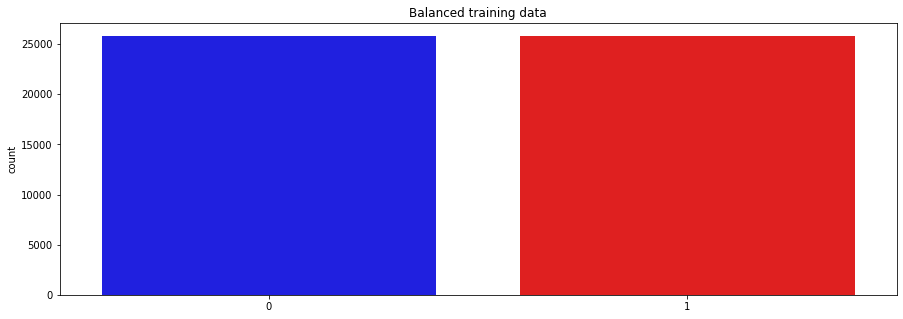

In [35]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='all', random_state=None, ratio=1.0)
X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)

sns.countplot(Y_train_smote)
plt.title('Balanced training data')
plt.rcParams['figure.figsize'] = (15.0, 5.0)
sns.set_palette(['blue', 'red'])
plt.show()

# Logistic Regression SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[11060    67]
 [   14  1216]]
The log determinant is: 7.128658410906637
The accuracy goal is: 99.34 %


Text(240.00000000000017, 0.5, 'Actual')

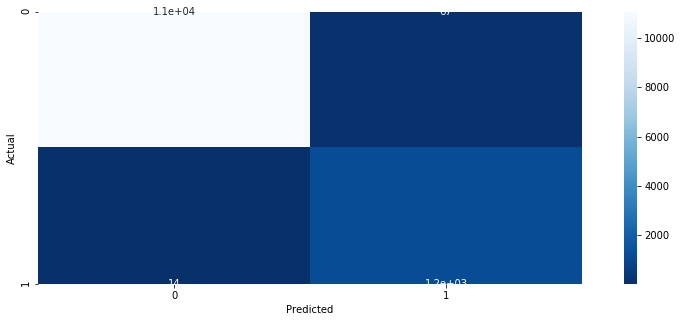

In [37]:
from sklearn.linear_model import LogisticRegression

#Now it is time to start classifying our target data using the Logisitic Regression algorithm.
Log_Classifier = LogisticRegression()
Log_Classifier.fit(X_train_smote,Y_train_smote)
Y_pred_log_smote = Log_Classifier.predict(X_test)

c_matrix_log_smote = confusion_matrix(Y_test,Y_pred_log_smote)
accgoal_log_smote = accuracy_score(Y_test, Y_pred_log_smote)
print(c_matrix_log_smote)
print('The log determinant is:', np.log10(np.linalg.det(c_matrix_log_smote)))
print("The accuracy goal is:",round(accgoal_log_smote*100,2),"%")

sns.heatmap(c_matrix_log_smote, annot=True, square=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# kNN algorithm SMOTE

The k parameter is: 11
[[11092    35]
 [   39  1191]]
The log determinant is: 7.120876746012586
The accuracy goal is: 99.4 %


Text(240.00000000000017, 0.5, 'Actual')

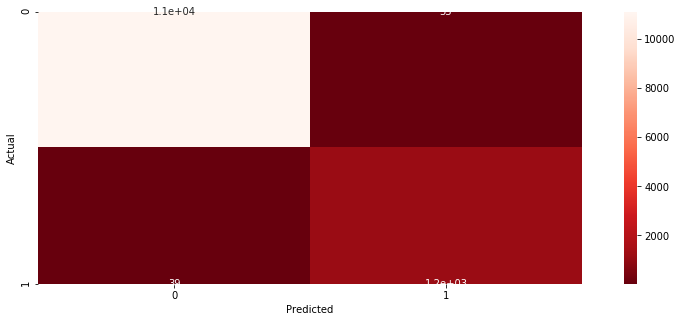

In [38]:
from sklearn.neighbors import KNeighborsClassifier

### We will repeat the same analysis but now with the KNN algorithm

kNN = 11 #I will use this parameter and we see that the accuracy is better than the Logistic regression.
print('The k parameter is:', kNN)
classifier_smote = KNeighborsClassifier(n_neighbors = kNN, p = 2, metric = 'euclidean' )
classifier_smote.fit(X_train_smote, Y_train_smote)
Y_pred_knn_smote = classifier.predict(X_test)
Y_pred_knn_smote = np.where(Y_pred_knn_smote>0.5,1.0,0.0)

c_matrix_knn_smote = confusion_matrix(Y_test, Y_pred_knn_smote)
accgoaal_knn_smote = accuracy_score(Y_test, Y_pred_knn_smote)
print(c_matrix_knn_smote)
print('The log determinant is:', np.log10(np.linalg.det(c_matrix_knn_smote)))
print("The accuracy goal is:",round(accgoaal_knn_smote*100,2),"%")


sns.heatmap(c_matrix_knn_smote, annot=True, square=True, cmap = 'Reds_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Light Grandient Boosting SMOTE

[[10967   160]
 [    0  1230]]
The log determinant is: 7.129992954909278
The accuracy goal is: 98.71 %
-----------------------


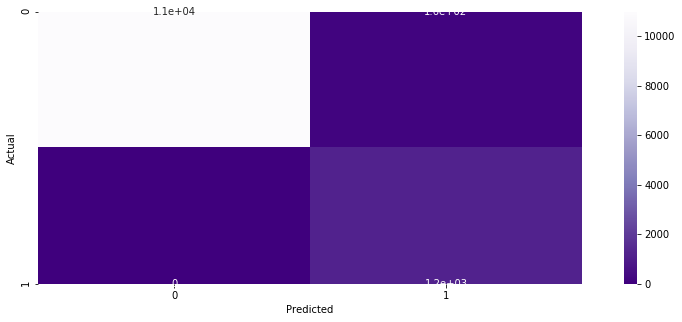

In [39]:
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# For this task we use a simple set of parameters to train the model. 
# We just want to create a baseline model, so we are not performing here cross validation or parameter tunning.

lgb_train_smote = lgb.Dataset(X_train_smote, Y_train_smote, free_raw_data=False)
lgb_test_smote = lgb.Dataset(X_test, Y_test, reference=lgb_train_smote, free_raw_data=False)

parameters = {'num_leaves': 2**8,
              'learning_rate': 0.1,
              'is_unbalance': True,
              'min_split_gain': 0.1,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', # comment this line if you are not using GPU
              'task': 'train'
              }
num_rounds = 300


clf_smote = lgb.train(parameters, lgb_train_smote, num_boost_round=num_rounds)

Y_prob_gb_smote = clf_smote.predict(X_test)

Y_pred_gb_smote = np.where(Y_prob_gb_smote > 0.5, 1, 0)
cmatrix_gb_smote = confusion_matrix(Y_test,Y_pred_gb_smote)
accgoal_gb_smote = accuracy_score(Y_test, Y_pred_gb_smote)
print(cmatrix_gb_smote)
print('The log determinant is:', np.log10(np.linalg.det(cmatrix_gb_smote)))
print("The accuracy goal is:", round(accgoal_gb_smote*100,2),'%')


plt.figure()
sns.heatmap(cmatrix_gb_smote, annot=True, square=True, cmap = 'Purples_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (5.0, 5.0)    # ... and big plots
print('-----------------------')

# Random Forest SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[10578   549]
 [    0  1230]]
The log determinant is: 7.114308674122364
The accuracy goal is: 95.56 %


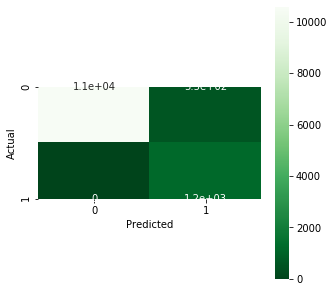

In [40]:
from sklearn.ensemble import RandomForestClassifier

classif_rmd_smote = RandomForestClassifier(min_samples_leaf=150)
classif_rmd_smote.fit(X_train_smote, Y_train_smote)
Y_pred_rmf_smote = classif_rmd_smote.predict(X_test)
accgoal_rmf_smote = accuracy_score(Y_pred_rmf_smote, Y_test)
cmatrix_rmf_smote = confusion_matrix(Y_test, Y_pred_rmf_smote)
print(cmatrix_rmf_smote)
print('The log determinant is:', np.log10(np.linalg.det(cmatrix_rmf_smote)))
print("The accuracy goal is:", round(accgoal_rmf_smote*100,2),'%')


sns.heatmap(cmatrix_rmf_smote, annot=True, square=True, cmap = 'Greens_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (5.0, 5.0)    # ... and big plots

# Empirical Sigmoid SMOTE

CPU times: user 4h 37min 4s, sys: 1h 8min 25s, total: 5h 45min 29s
Wall time: 1h 31min 20s
[[11042    85]
 [   13  1217]]
The log determinant is: 7.12830260805138
The accuracy goal is: 99.21 %


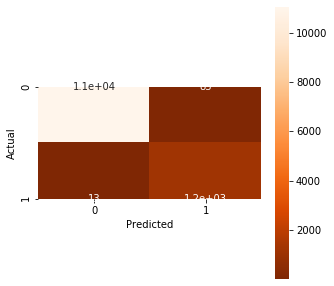

In [41]:
class Empirical_Classifier:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __empirical_class(self, z):
        return 0.5*(1.0 + z/(1.0+np.abs(z)))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__empirical_class(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__empirical_class(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print('floss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__empirical_class(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

model = Empirical_Classifier(lr=0.1, num_iter=300000)
%time model.fit(X_train_smote, Y_train_smote)
Y_pred_emp_smote = model.predict(X_test)
params = model.theta

accgoal_emp_smote = accuracy_score(Y_pred_emp_smote, Y_test)
c_matrix_emp_smote = confusion_matrix(Y_test, Y_pred_emp_smote)
print(c_matrix_emp_smote)
print('The log determinant is:', np.log10(np.linalg.det(c_matrix_emp_smote)))
print("The accuracy goal is:", round(accgoal_emp_smote*100,2),'%')

sns.heatmap(c_matrix_emp_smote, annot=True, square=True, cmap = 'Oranges_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (8.0, 8.0)    # ... and big plots

# Artificial Neural Networks SMOTE

Epoch 1/100
51618/51618 [==============================] - 3s 59us/step - loss: 0.0875 - accuracy: 0.9693
Epoch 2/100
51618/51618 [==============================] - 2s 47us/step - loss: 0.0156 - accuracy: 0.9948
Epoch 3/100
51618/51618 [==============================] - 2s 44us/step - loss: 0.0126 - accuracy: 0.9952
Epoch 4/100
51618/51618 [==============================] - 2s 45us/step - loss: 0.0113 - accuracy: 0.9953
Epoch 5/100
51618/51618 [==============================] - 2s 44us/step - loss: 0.0101 - accuracy: 0.9954
Epoch 6/100
51618/51618 [==============================] - 2s 45us/step - loss: 0.0092 - accuracy: 0.9959
Epoch 7/100
51618/51618 [==============================] - 2s 45us/step - loss: 0.0087 - accuracy: 0.9963
Epoch 8/100
51618/51618 [==============================] - 3s 48us/step - loss: 0.0083 - accuracy: 0.9964
Epoch 9/100
51618/51618 [==============================] - 3s 57us/step - loss: 0.0078 - accuracy: 0.9965
Epoch 10/100
51618/51618 [====================

51618/51618 [==============================] - 2s 44us/step - loss: 0.0012 - accuracy: 0.9996
Epoch 78/100
51618/51618 [==============================] - 2s 44us/step - loss: 0.0011 - accuracy: 0.9997
Epoch 79/100
51618/51618 [==============================] - 2s 43us/step - loss: 8.7022e-04 - accuracy: 0.9997
Epoch 80/100
51618/51618 [==============================] - 2s 43us/step - loss: 0.0015 - accuracy: 0.9994
Epoch 81/100
51618/51618 [==============================] - 2s 43us/step - loss: 0.0011 - accuracy: 0.9996
Epoch 82/100
51618/51618 [==============================] - 2s 43us/step - loss: 9.0676e-04 - accuracy: 0.9997
Epoch 83/100
51618/51618 [==============================] - 2s 44us/step - loss: 0.0010 - accuracy: 0.9996
Epoch 84/100
51618/51618 [==============================] - 2s 44us/step - loss: 7.5776e-04 - accuracy: 0.9997
Epoch 85/100
51618/51618 [==============================] - 2s 43us/step - loss: 8.2642e-04 - accuracy: 0.9998
Epoch 86/100
51618/51618 [========

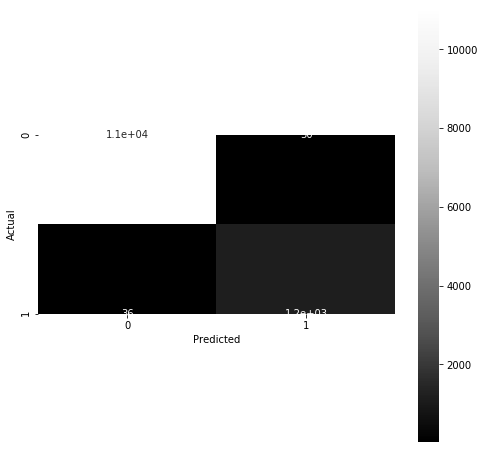

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense# Initialising the ANN
"Activation functions: 'sigmoid', 'tanh', 'relu'"
classifier = Sequential()# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 52))# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])# Fitting the ANN to the Training set
classifier.fit(X_train_smote, Y_train_smote, batch_size = 32, epochs = 100)

# Predicting the Test set results
Y_pred_ann_smote = classifier.predict(X_test)
Y_pred_ann_smote = (Y_pred_ann_smote > 0.5)
accgoal_ann_smote = accuracy_score(Y_pred_ann_smote, Y_test)

cmatrix_ann_smote = confusion_matrix(Y_test, Y_pred_ann_smote) # rows = truth, cols = prediction
print(cmatrix_ann_smote)
print('The log determinant is:', np.log10(np.linalg.det(cmatrix_ann_smote)))
print("The accuracy goal is:", round(accgoal_ann_smote*100,2),'%')


sns.heatmap(cmatrix_ann_smote, annot=True, square=True, cmap = 'Greys_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = (8.0, 8.0)    # ... and big plots

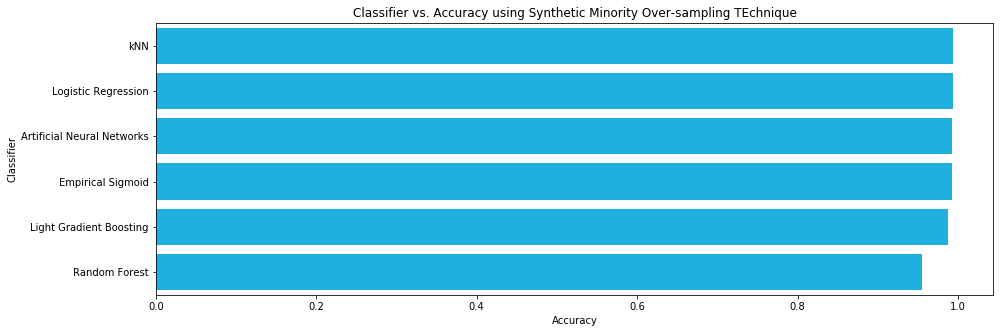

In [47]:
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
log_entry = pd.DataFrame([['kNN',accgoaal_knn_smote],['Logistic Regression',accgoal_log_smote],['Artificial Neural Networks',accgoal_ann_smote],['Empirical Sigmoid', accgoal_emp_smote], ['Light Gradient Boosting',accgoal_gb_smote], ['Random Forest', accgoal_rmf_smote]], columns=log_cols)
        #metric_entry = pd.DataFrame([[precision,recall,f1_score,roc_auc]], columns=metrics_cols)
log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier vs. Accuracy using Synthetic Minority Over-sampling TEchnique')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="deepskyblue")  
plt.rcParams['figure.figsize'] = (15.0, 5.0)    # ... and big plots
plt.show()

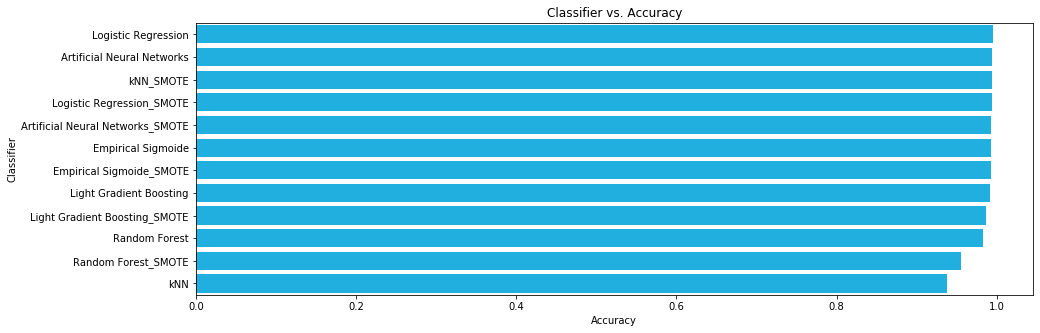

In [58]:
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
log_entry = pd.DataFrame([['Logistic Regression',accgoal_log],['Artificial Neural Networks',accgoal_ann],['kNN_SMOTE',accgoaal_knn_smote],['Logistic Regression_SMOTE',accgoal_log_smote],['Artificial Neural Networks_SMOTE',accgoal_ann_smote],['Empirical Sigmoide', accgoal_emp],['Empirical Sigmoide_SMOTE', accgoal_emp_smote], ['Light Gradient Boosting',accgoal_gb], ['Light Gradient Boosting_SMOTE',accgoal_gb_smote], ['Random Forest', accgoal_rmf],['Random Forest_SMOTE', accgoal_rmf_smote],['kNN',accgoaal_knn]], columns=log_cols)
        #metric_entry = pd.DataFrame([[precision,recall,f1_score,roc_auc]], columns=metrics_cols)
log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier vs. Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="deepskyblue")  
plt.rcParams['figure.figsize'] = (15.0, 5.0)    # ... and big plots
plt.show()